In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pkg_resources
import scipy
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
data = pd.read_csv("static_ranked_biz.csv")

In [3]:
pd.set_option('display.max_columns', None)
data.head()

,Unnamed: 0,name,station_code,code,code2,code3,interchange,NS,SW,CC,EW,NE,BP,CE,DT,PW,TE,PE,CG,SE,totalTapIn,totalTapOut,cluster,postal,x,y,lat,long,subzone,area,region,status,bus_interchange,mrt_interchange,svc,bus count,pop,geometry,groceryCount,mallCount,adj_stations,dist_to_nearest_station,hub,min_dist_to_hub,nearest_hub,bus_rank,pop_rank,hub_dist_rank,adj_count_rank,dist_to_neighbour_rank,pop-bus_rank,bizCount
0,0,Bukit Panjang,BP6/DT1,BP6,DT1,NaN,True,NaN,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,503763.25,540350.25,0.0,678213,20011.39812,40108.68377,1.379002,103.761535,Gombak,Bukit Batok,West,operational,True,True,"170A,974A,972A,176,180A,190A,963,961M,180,171,...",36,9930.0,POINT (1.379002116 103.7615351),23,14,2.0,1.071309,False,5.529046,Jurong East,0.885906,0.536913,0.671141,0.204698,0.610738,-0.348993,614
1,1,MacPherson,CC10/DT26,CC10,DT26,NaN,True,NaN,NaN,10.0,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,229332.25,218221.75,2.0,378956,34230.01048,34264.54353,1.326150,103.889299,Macpherson,Geylang,Central,operational,False,True,"24,155,135,154,70,80A,137,76,43,158,63A,65,43e...",21,28360.0,POINT (1.326150245 103.8892986),37,3,7.0,0.677504,False,6.287145,Raffles Place,0.697987,0.775168,0.805369,0.714765,0.177852,0.077181,3763
2,2,Tai Seng,CC11,CC11,NaN,NaN,False,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,222885.50,225728.50,1.0,534803,34128.79235,35258.74882,1.335142,103.888389,Tai Seng,Hougang,North-East,operational,False,False,"24,70,151,80A,76,58A,43,158,62A,90A,62,90,22,9...",20,13830.0,POINT (1.3351415009999998 103.8883893),32,6,4.0,1.004879,False,6.624440,Tampines,0.674497,0.637584,0.838926,0.469799,0.530201,-0.036913,3677
3,3,Bartley,CC12,CC12,NaN,NaN,False,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87827.50,75543.75,2.0,539788,33214.93397,36072.52553,1.342501,103.880178,Bidadari,Toa Payoh,Central,operational,False,False,"93,158,129,28",4,0.0,POINT (1.342501178 103.8801779),20,5,5.0,1.103678,False,7.233564,Raffles Place,0.140940,0.016779,0.892617,0.583893,0.664430,-0.124161,2860
4,4,Lorong Chuan,CC14,CC14,NaN,NaN,False,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104689.00,100974.75,2.0,554533,31431.40547,37079.94437,1.351612,103.864152,Lorong Chuan,Serangoon,North-East,operational,False,False,"105,58",2,8490.0,POINT (1.351612171 103.8641519),28,9,3.0,0.964370,False,7.635612,Raffles Place,0.080537,0.496644,0.919463,0.348993,0.479866,0.416107,1370


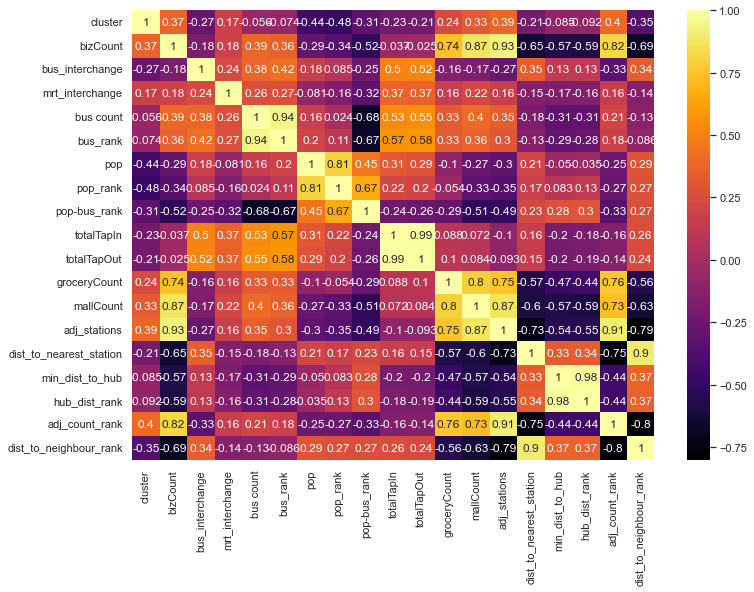

In [4]:
sb.set(rc={'figure.figsize':(11.7,8.27)})
dataplot = sb.heatmap(
    data[[
                                "cluster","bizCount",
                                "bus_interchange", "mrt_interchange", 
                                "bus count", "bus_rank",
                                "pop", "pop_rank",
                                "pop-bus_rank",
                                "totalTapIn", "totalTapOut", 
                                "groceryCount", "mallCount",
                                "adj_stations", "dist_to_nearest_station", "min_dist_to_hub", 
                                "hub_dist_rank","adj_count_rank", "dist_to_neighbour_rank"
         ]].corr(),
    cmap="inferno", annot=True)

# Split Data

In [5]:
operational = data[(data["status"]!="future")
                           #& (combinedData["hub"].notna())
                          ]
y = operational["cluster"]
X = pd.DataFrame(operational[[ 
                                "bizCount",
                                "bus_interchange", "mrt_interchange", 
                                #"bus count", "bus_rank",
                                "pop", "pop_rank",
                                "pop-bus_rank",
                                "totalTapIn", "totalTapOut", 
                                "groceryCount", "mallCount",
                                "adj_stations", "dist_to_nearest_station", "min_dist_to_hub", 
                                "hub_dist_rank","adj_count_rank", "dist_to_neighbour_rank"
                               ]].to_numpy())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Decision Trees

[Text(0.5, 0.8333333333333334, '4 <= 0.599\ngini = 0.62\nsamples = 101\nvalue = [40, 16, 45]\nclass = 2'),
 Text(0.25, 0.5, '8 <= 36.5\ngini = 0.561\nsamples = 56\nvalue = [8, 15, 33]\nclass = 2'),
 Text(0.125, 0.16666666666666666, 'gini = 0.637\nsamples = 36\nvalue = [7, 14, 15]\nclass = 2'),
 Text(0.375, 0.16666666666666666, 'gini = 0.185\nsamples = 20\nvalue = [1, 1, 18]\nclass = 2'),
 Text(0.75, 0.5, '6 <= 234767.125\ngini = 0.423\nsamples = 45\nvalue = [32, 1, 12]\nclass = 0'),
 Text(0.625, 0.16666666666666666, 'gini = 0.544\nsamples = 21\nvalue = [10, 1, 10]\nclass = 0'),
 Text(0.875, 0.16666666666666666, 'gini = 0.153\nsamples = 24\nvalue = [22, 0, 2]\nclass = 0')]

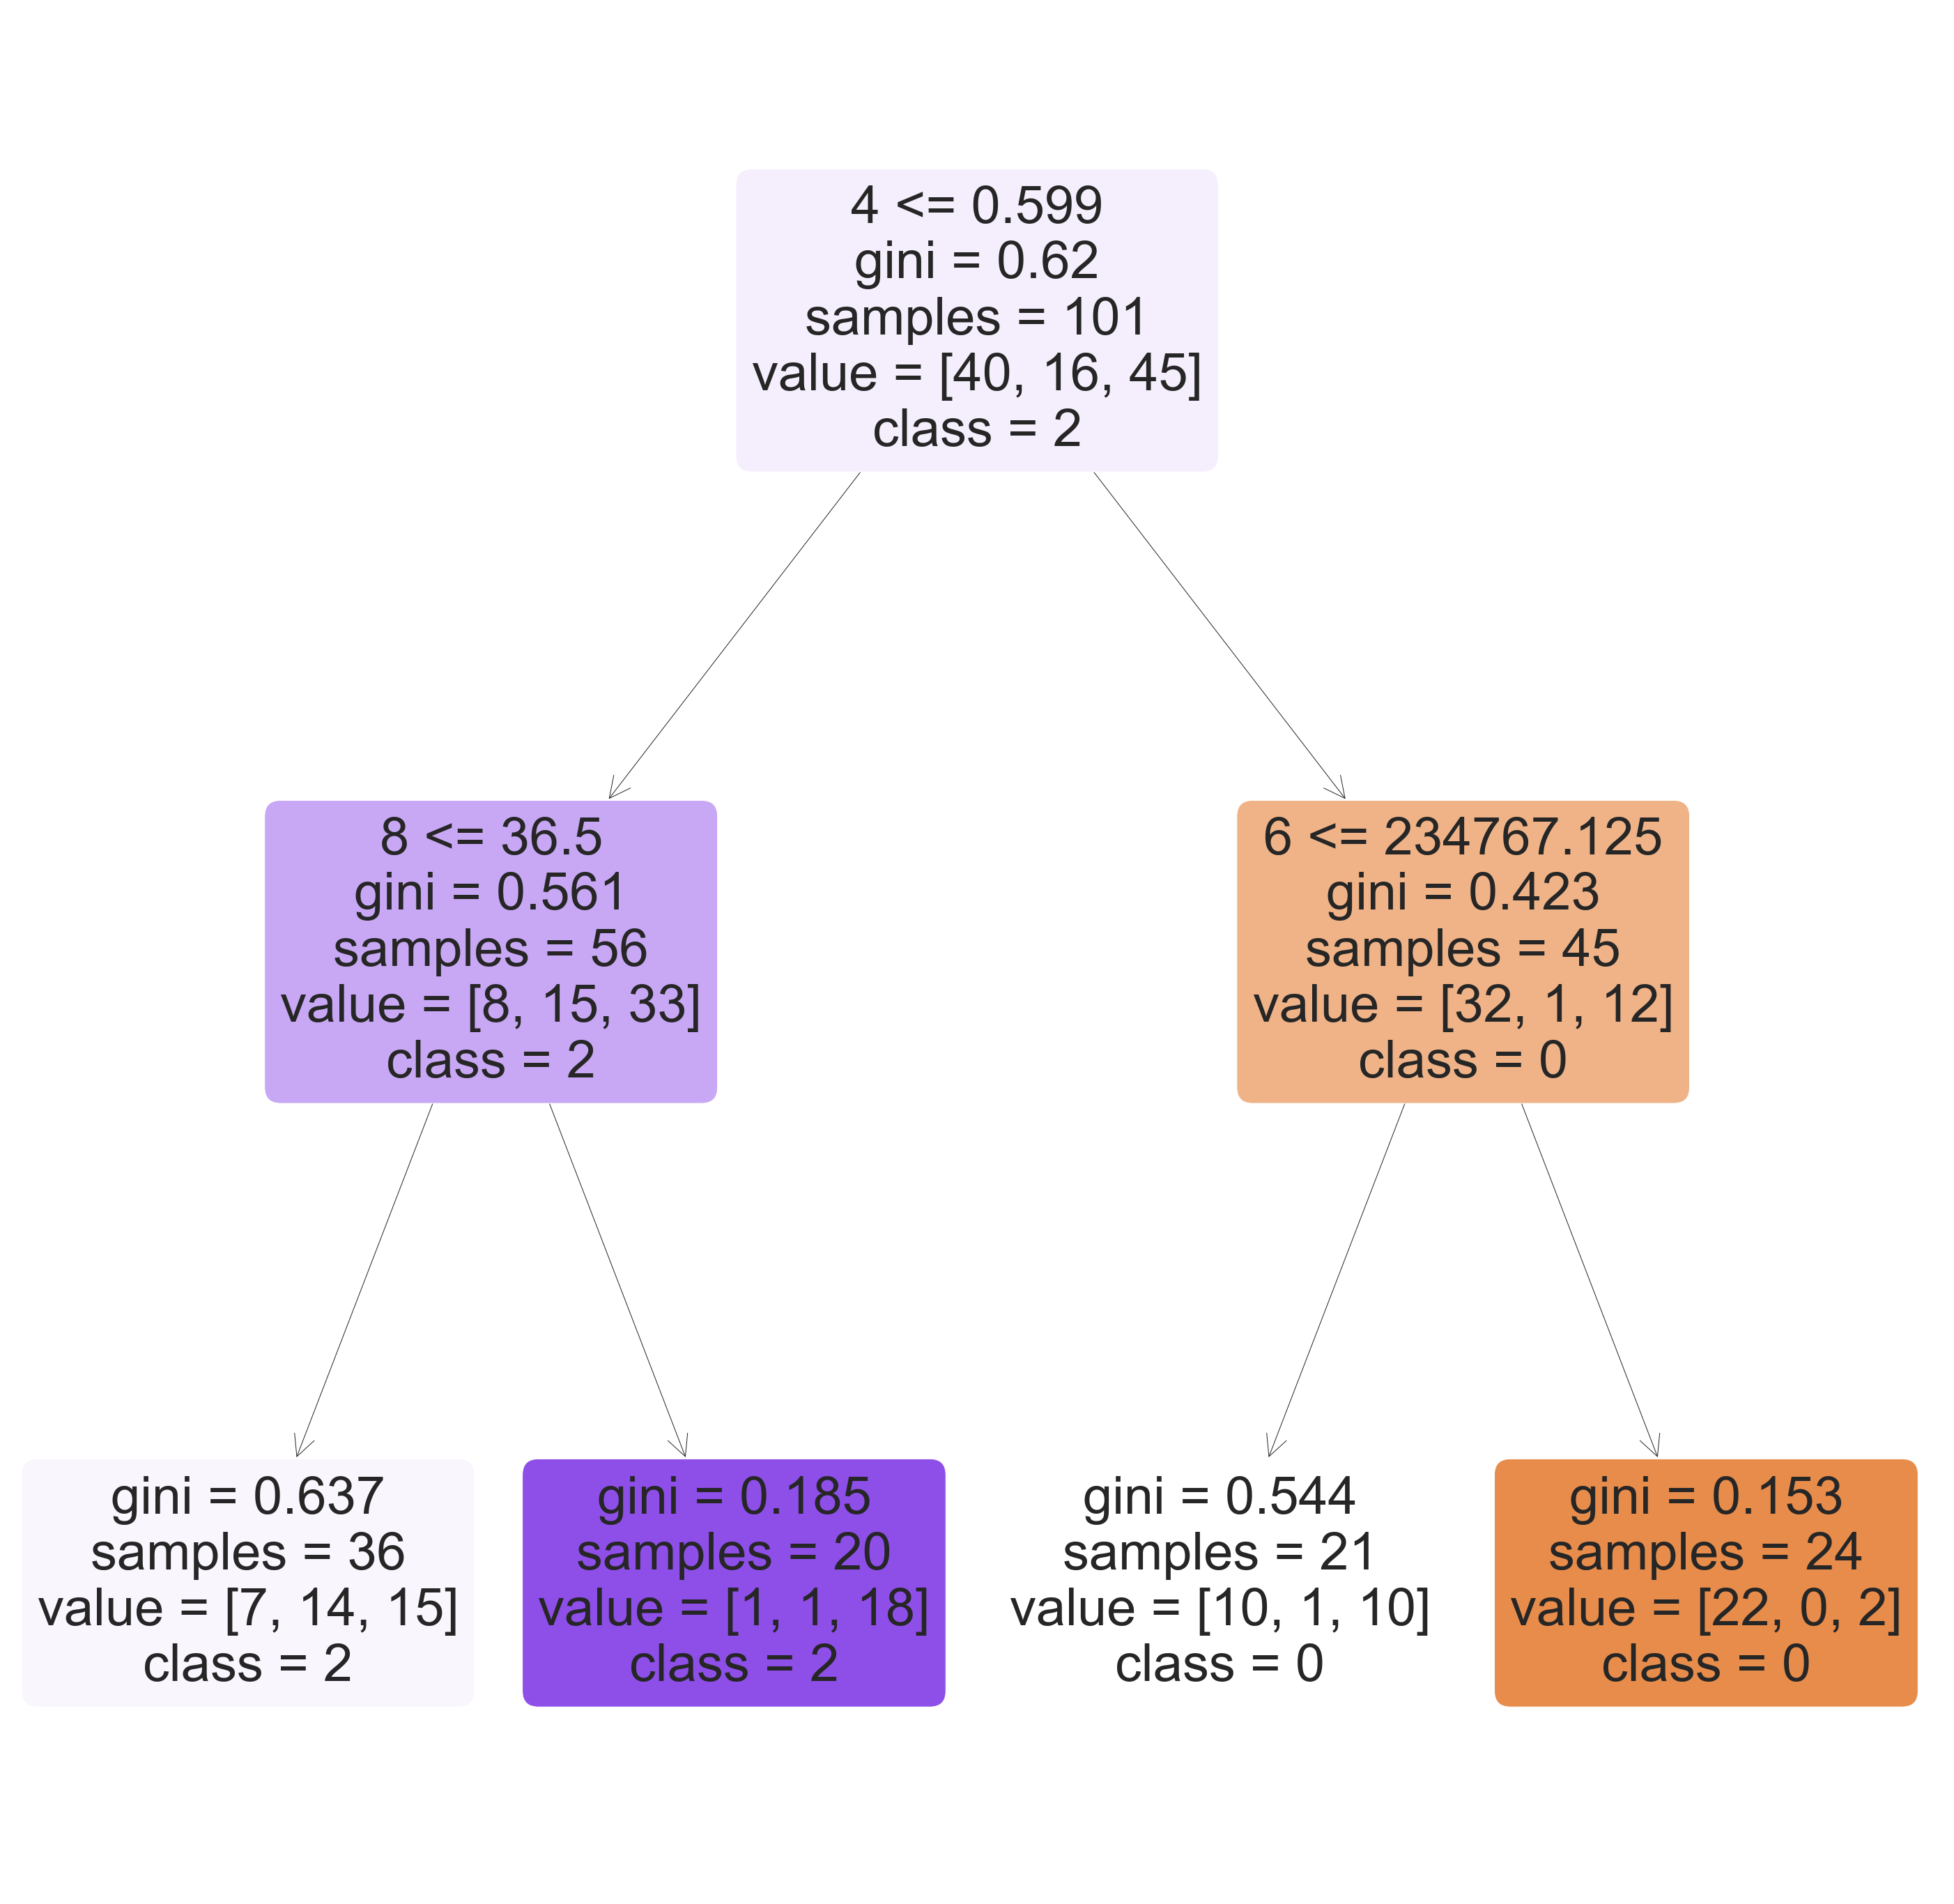

In [6]:
decTree = DecisionTreeClassifier(max_depth = 2)
decTree.fit(X_train, y_train)

f = plt.figure(figsize=(50,50))
plot_tree(decTree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["0","1", "2"])

In [7]:
print(decTree.score(X_train, y_train))
print(decTree.score(X_test, y_test))

0.6435643564356436
0.6923076923076923


# Logistic Regression

In [8]:
logReg = LogisticRegression(multi_class= 'multinomial', solver = 'lbfgs', max_iter = 1000000)         # create the linear regression object
logReg.fit(X_train, y_train)        # train the linear regression model


# Predict Response corresponding to Predictors
y_train_pred = logReg.predict(X_train)
y_test_pred = logReg.predict(X_test)


############## TRAIN
y_train_NP = y_train.to_numpy()
resultsTrain = y_train_NP - y_train_pred
train_acc = np.count_nonzero(resultsTrain==0)/y_train_NP.size

print("Train Accuracy =", train_acc)

############## TEST
y_test_NP = y_test.to_numpy()
resultsTest = y_test_NP - y_test_pred
test_acc = np.count_nonzero(resultsTest==0)/y_test_NP.size

print("Test Accuracy =", test_acc)

Train Accuracy = 0.6138613861386139
Test Accuracy = 0.6538461538461539


# Discriminant Analysis

In [9]:
clf = LinearDiscriminantAnalysis(solver = 'eigen', shrinkage = 'auto')
clf.fit(X_train, y_train)
# Predict Response corresponding to Predictors
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

y_train_NP = y_train.to_numpy()
resultsTrain = y_train_NP - y_train_pred
train_acc = np.count_nonzero(resultsTrain==0)/y_train_NP.size

print("Train Accuracy =", train_acc)

############## TEST
y_test_NP = y_test.to_numpy()
resultsTest = y_test_NP - y_test_pred
test_acc = np.count_nonzero(resultsTest==0)/y_test_NP.size

print("Test Accuracy =", test_acc)

Train Accuracy = 0.7029702970297029
Test Accuracy = 0.7307692307692307
